In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('D:\Datasets\Google Stock Price Prediction\Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df['Volume']=df['Volume'].apply(lambda x:''.join(x.split(',')))

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [6]:
X=df[['Open','High','Low','Volume']]

In [7]:
X

,Open,High,Low,Volume
0,325.25,332.83,324.97,7380500
1,331.27,333.87,329.08,5749400
2,329.83,330.75,326.89,6590300
3,328.34,328.77,323.68,5405900
4,322.04,322.29,309.46,11688800
...,...,...,...,...
1253,790.90,792.74,787.28,623400
1254,790.68,797.86,787.66,789100
1255,793.70,794.23,783.20,1153800
1256,783.33,785.93,778.92,744300


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scalar=MinMaxScaler()

In [10]:
scalar.fit(X)

MinMaxScaler()

In [11]:
X_scaled=scalar.transform(X)

In [12]:
X_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [13]:
X_scaled.shape

(1258, 4)

In [14]:
X_training=[]
for i in range(1198):
    row=X_scaled[i:61+i,:]
    X_training.append(row)
    

In [15]:
X_training=np.array(X_training)

In [16]:
X_training.shape

(1198, 61, 4)

In [17]:
y=X_training[:,-1]

In [18]:
y.shape

(1198, 4)

In [19]:
X_training=X_training[:,:60]

In [20]:
X_training.shape

(1198, 60, 4)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [22]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(60,4)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           42000     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 132,851
Trainable params: 132,851
Non-trai

In [24]:
model.fit(X_training,y,epochs=80,batch_size=32)

Epoch 1/80
38/38 [==============================] - 8s 79ms/step - loss: 0.0719
Epoch 2/80
38/38 [==============================] - 3s 74ms/step - loss: 0.0547
Epoch 3/80
38/38 [==============================] - 3s 79ms/step - loss: 0.0543
Epoch 4/80
38/38 [==============================] - 3s 84ms/step - loss: 0.0526
Epoch 5/80
38/38 [==============================] - 3s 79ms/step - loss: 0.0516
Epoch 6/80
38/38 [==============================] - 3s 80ms/step - loss: 0.0510
Epoch 7/80
38/38 [==============================] - 3s 76ms/step - loss: 0.0514
Epoch 8/80
38/38 [==============================] - 3s 75ms/step - loss: 0.0501
Epoch 9/80
38/38 [==============================] - 3s 76ms/step - loss: 0.0503
Epoch 10/80
38/38 [==============================] - 3s 73ms/step - loss: 0.0496
Epoch 11/80
38/38 [==============================] - 3s 76ms/step - loss: 0.0499
Epoch 12/80
38/38 [==============================] - 3s 79ms/step - loss: 0.0494
Epoch 13/80
38/38 [==================

In [58]:
model.save('stock_priceAmol.h5')

In [59]:
df_test=pd.read_csv('D:\Datasets\Google Stock Price Prediction\Google_Stock_Price_Test.csv')

In [60]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [61]:
X_test=df_test[['Open','High','Low','Volume']]

In [62]:
X_test

,Open,High,Low,Volume
0,778.81,789.63,775.80,"1,657,300"
1,788.36,791.34,783.16,"1,073,000"
2,786.08,794.48,785.02,"1,335,200"
3,795.26,807.90,792.20,"1,640,200"
4,806.40,809.97,802.83,"1,272,400"
5,807.86,809.13,803.51,"1,176,800"
6,805.00,808.15,801.37,"1,065,900"
7,807.14,807.39,799.17,"1,353,100"
8,807.48,811.22,806.69,"1,099,200"
9,807.08,807.14,800.37,"1,362,100"


In [63]:
X_tst_list=X_test['Volume'].str.split(',')

In [64]:
X_test['Volume']=X_tst_list.apply(lambda x: ''.join(x))

C:\Users\amol\AppData\Local\Temp\ipykernel_3408\2261196880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Volume']=X_tst_list.apply(lambda x: ''.join(x))


In [65]:
X_test

,Open,High,Low,Volume
0,778.81,789.63,775.80,1657300
1,788.36,791.34,783.16,1073000
2,786.08,794.48,785.02,1335200
3,795.26,807.90,792.20,1640200
4,806.40,809.97,802.83,1272400
5,807.86,809.13,803.51,1176800
6,805.00,808.15,801.37,1065900
7,807.14,807.39,799.17,1353100
8,807.48,811.22,806.69,1099200
9,807.08,807.14,800.37,1362100


In [66]:
X_test_scaled=scalar.transform(X_test)

In [67]:
X_test_scaled

array([[0.92955205, 0.94948363, 0.9444234 , 0.06605527],
       [0.94731751, 0.95267709, 0.9583649 , 0.04265519],
       [0.94307612, 0.95854109, 0.96188816, 0.05315579],
       [0.96015329, 0.98360319, 0.97548871, 0.06537044],
       [0.98087655, 0.98746895, 0.99562434, 0.05064077],
       [0.98359253, 0.98590024, 0.99691241, 0.04681217],
       [0.97827219, 0.98407007, 0.99285877, 0.04237085],
       [0.98225314, 0.98265076, 0.98869147, 0.05387265],
       [0.98288563, 0.98980335, 1.00293605, 0.04370445],
       [0.98214153, 0.98218388, 0.99096454, 0.05423308],
       [0.979779  , 0.98044708, 0.99213896, 0.05152183],
       [0.97849542, 0.98655387, 0.99367328, 0.0364998 ],
       [0.98182528, 0.98175435, 0.99346492, 0.06656388],
       [0.98245777, 1.0078249 , 0.99734808, 0.07832199],
       [1.01045465, 1.01721852, 1.02401879, 0.05871446],
       [1.02407173, 1.03565092, 1.03773299, 0.05953544],
       [1.03930724, 1.03981549, 1.04142673, 0.11878254],
       [1.03354044, 1.04719219,

In [68]:
X_test_upper=X_scaled[-60:,:]

In [69]:
type(X_test_upper)

numpy.ndarray

In [70]:
type(X_scaled)

numpy.ndarray

In [71]:
X_test_scaled=np.append(X_test_upper,X_test_scaled,axis=0)

In [72]:
X_test_scaled.shape

(80, 4)

In [73]:
X_test_input=[]
for i in range(20):
    row=X_test_scaled[i:i+61,:]
    X_test_input.append(row)

In [74]:
X_test_input=np.array(X_test_input)

In [75]:
X_test_input.shape

(20, 61, 4)

In [76]:
X_test_x=X_test_input[:,:60]

In [77]:
X_test_x.shape

(20, 60, 4)

In [78]:
y_actual=X_test_input[:,-1]

In [79]:
y_actual.shape

(20, 4)

In [80]:
y_actual

array([[0.92955205, 0.94948363, 0.9444234 , 0.06605527],
       [0.94731751, 0.95267709, 0.9583649 , 0.04265519],
       [0.94307612, 0.95854109, 0.96188816, 0.05315579],
       [0.96015329, 0.98360319, 0.97548871, 0.06537044],
       [0.98087655, 0.98746895, 0.99562434, 0.05064077],
       [0.98359253, 0.98590024, 0.99691241, 0.04681217],
       [0.97827219, 0.98407007, 0.99285877, 0.04237085],
       [0.98225314, 0.98265076, 0.98869147, 0.05387265],
       [0.98288563, 0.98980335, 1.00293605, 0.04370445],
       [0.98214153, 0.98218388, 0.99096454, 0.05423308],
       [0.979779  , 0.98044708, 0.99213896, 0.05152183],
       [0.97849542, 0.98655387, 0.99367328, 0.0364998 ],
       [0.98182528, 0.98175435, 0.99346492, 0.06656388],
       [0.98245777, 1.0078249 , 0.99734808, 0.07832199],
       [1.01045465, 1.01721852, 1.02401879, 0.05871446],
       [1.02407173, 1.03565092, 1.03773299, 0.05953544],
       [1.03930724, 1.03981549, 1.04142673, 0.11878254],
       [1.03354044, 1.04719219,

In [81]:
y_predicted=model.predict(X_test_x)

1/1 [==============================] - 0s 36ms/step


In [82]:
y_predicted

array([[0.70830923],
       [0.7121701 ],
       [0.71644014],
       [0.71857727],
       [0.7306399 ],
       [0.7350242 ],
       [0.7342535 ],
       [0.7310471 ],
       [0.73094875],
       [0.7350956 ],
       [0.7280761 ],
       [0.7285495 ],
       [0.7275477 ],
       [0.72895014],
       [0.7345814 ],
       [0.7434431 ],
       [0.74964756],
       [0.7535581 ],
       [0.7461901 ],
       [0.7221186 ]], dtype=float32)

In [83]:
df_test['Open']

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [84]:
yp_like = np.zeros(shape=(len(y_predicted), 4) )

In [85]:
yp_like.shape

(20, 4)

In [86]:
yp_like[:,0]=y_predicted[:,0]

In [87]:
yp_like

array([[0.70830923, 0.        , 0.        , 0.        ],
       [0.71217012, 0.        , 0.        , 0.        ],
       [0.71644014, 0.        , 0.        , 0.        ],
       [0.71857727, 0.        , 0.        , 0.        ],
       [0.73063987, 0.        , 0.        , 0.        ],
       [0.73502421, 0.        , 0.        , 0.        ],
       [0.73425353, 0.        , 0.        , 0.        ],
       [0.73104709, 0.        , 0.        , 0.        ],
       [0.73094875, 0.        , 0.        , 0.        ],
       [0.73509562, 0.        , 0.        , 0.        ],
       [0.7280761 , 0.        , 0.        , 0.        ],
       [0.72854948, 0.        , 0.        , 0.        ],
       [0.72754771, 0.        , 0.        , 0.        ],
       [0.72895014, 0.        , 0.        , 0.        ],
       [0.73458141, 0.        , 0.        , 0.        ],
       [0.74344307, 0.        , 0.        , 0.        ],
       [0.74964756, 0.        , 0.        , 0.        ],
       [0.7535581 , 0.        ,

In [88]:
yp=scalar.inverse_transform(yp_like)

In [89]:
import matplotlib.pyplot as plt

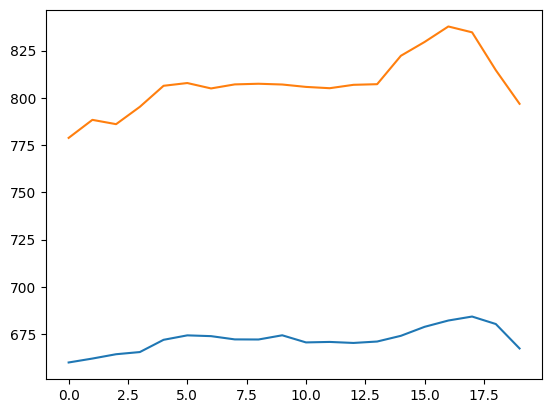

In [90]:
plt.plot(yp[:,0])
plt.plot(df_test['Open'])

In [1]:
pwd

'C:\\Users\\amol\\Git_Folder'